In [162]:
import pandas as pd
import os
from Bio import Entrez, SeqIO
import tqdm
from collections import Counter
import numpy as np
from scipy.stats import multinomial
import numpy as np
import matplotlib.pyplot as plt


In [3]:
iterator = pd.read_csv("/Users/reem/Downloads/metadata_tsv_2025_09_28/metadata.tsv", sep="\t", chunksize=1000)
metadata_df = pd.concat([chunk for chunk in tqdm.tqdm(iterator, desc='Loading data')])



Loading data: 17454it [01:51, 156.30it/s]


In [ ]:
metadata_df["Virus name"] = metadata_df["Virus name"].str.split("|").str[0]

In [191]:
df= pd.read_csv("/Users/reem/Mov/nextclade_results/molnupiravir_misc/step_2_nextclade/llrs_only.tsv", sep="\t")

In [192]:
df.columns.tolist()
mov_cols = ['G>A_llr','C>T_llr','A>G_llr','T>C_llr']
#'A>T_llr','C>A_llr',,'G>T_llr', 'T>A_llr','T>G_llr','C>G_llr','A>C_llr','G>C_llr']
df[mov_cols] = df[mov_cols].replace([-np.inf, np.nan], -100)

In [193]:
df['sum_llrs']=df[mov_cols].sum(axis=1,numeric_only=True)
#df['sum_llrs'].head()


print(df['sum_llrs'].min())
print(df['sum_llrs'].max())

-305.18233465392984
294.0874283707519


In [ ]:
#Merge metadata with llr table based on sequence name
# df["seqName"]= df["seqName"].str.split("|").str[0]
# df["seqName"].head()
# merged_df = pd.merge(df, metadata_df, left_on='seqName', right_on='Virus name', how='left')

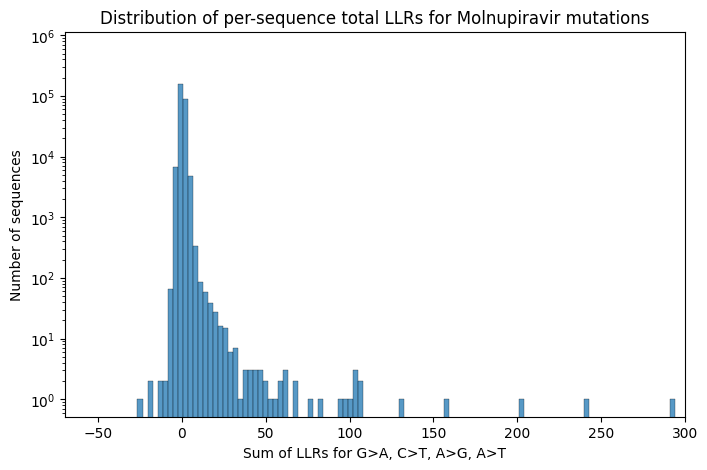

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,5))
sns.histplot(df["sum_llrs"], bins=200, kde=False)
plt.xlim(-70, 300)
plt.yscale('log')
plt.title("Distribution of per-sequence total LLRs for Molnupiravir mutations")
plt.xlabel("Sum of LLRs for G>A, C>T, A>G, A>T")
plt.ylabel("Number of sequences")
plt.show()

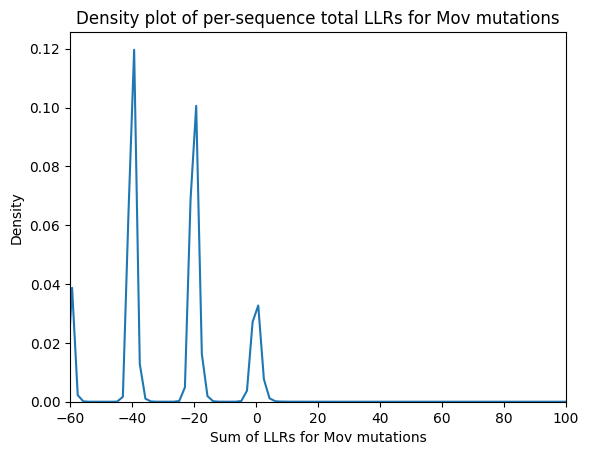

In [8]:
sns.kdeplot(df["sum_llrs"], bw_adjust=0.5)
plt.xlim(-60, 100)
plt.xlabel("Sum of LLRs for Mov mutations")
plt.title("Density plot of per-sequence total LLRs for Mov mutations")
plt.show()

In [18]:
len(df['sum_llrs'][df['sum_llrs']<0])

1837783

In [19]:
df_mov = df[df['sum_llrs']>20]
print(len(df_mov))

93


In [196]:

df['country'] = df['seqName'].str.split("/").str[1]
df['year'] = df['seqName'].str.split("/").str[3]
df = df[['seqName','G>A_llr','C>T_llr','A>G_llr','T>C_llr','sum_llrs','country', 'year',]]
df.to_csv("molnupiravir_positive_llrs.tsv", sep="\t", index=False)

print(df['country'].value_counts())
print(df['year'].value_counts())



country
USA                      599394
England                  278307
Germany                  108477
Canada                    91829
Japan                     79576
                          ...  
Sao Tome and Principe         1
Lishui                        1
syrian hamster                1
mongolia                      1
Changde                       1
Name: count, Length: 323, dtype: int64
year
2021|2021|2021-06-30          1174
2022|2022-02-22|2022-03-01     909
2022|2022-02-14|2022-02-28     821
2022|2022-03-09|2022-03-16     803
2022|2022-03-14|2022-03-22     798
                              ... 
2025|2025-05-20|2025-07-01       1
2023|2023-03-07|2024-02-12       1
2021|2021-08-06|2022-02-14       1
2021|2021-06-08|2025-06-19       1
2020|2020-11-26|2021-03-14       1
Name: count, Length: 191551, dtype: int64


In [170]:
thresholds = [2,5,6,7,8,10,15,20]
countries = ['Australia','France']
for t in thresholds:
    for country in countries:
        count = len(df[(df['sum_llrs'] > t) & (df['seqName'].str.contains(f"/{country}/"))])
        print(f"Number of sequences from {country} with sum_llrs > {t}: {count}")

             

Number of sequences from Australia with sum_llrs > 2: 301
Number of sequences from France with sum_llrs > 2: 1042
Number of sequences from Australia with sum_llrs > 5: 70
Number of sequences from France with sum_llrs > 5: 90
Number of sequences from Australia with sum_llrs > 6: 65
Number of sequences from France with sum_llrs > 6: 22
Number of sequences from Australia with sum_llrs > 7: 56
Number of sequences from France with sum_llrs > 7: 6
Number of sequences from Australia with sum_llrs > 8: 50
Number of sequences from France with sum_llrs > 8: 0
Number of sequences from Australia with sum_llrs > 10: 37
Number of sequences from France with sum_llrs > 10: 0
Number of sequences from Australia with sum_llrs > 15: 21
Number of sequences from France with sum_llrs > 15: 0
Number of sequences from Australia with sum_llrs > 20: 9
Number of sequences from France with sum_llrs > 20: 0


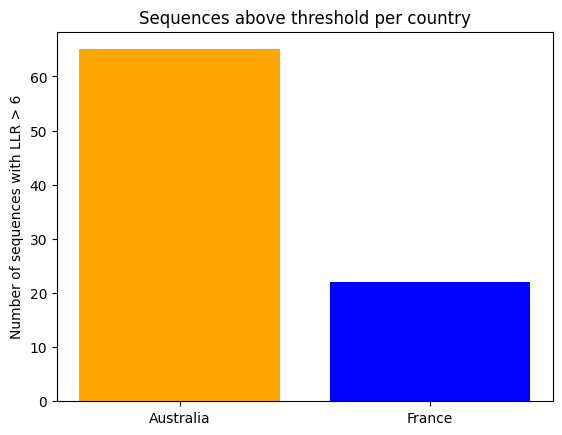

In [171]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define threshold
t = 6

# Count sequences above threshold for each country
countries = ['Australia', 'France']
counts = [
    (df[df['country']=='Australia']['sum_llrs'] > t).sum(),
    (df[df['country']=='France']['sum_llrs'] > t).sum()
]

# Create bar plot
plt.bar(countries, counts, color=['orange', 'blue'])
plt.ylabel("Number of sequences with LLR > {}".format(t))
plt.title("Sequences above threshold per country")
plt.show()

t= 0: Australia_above=1595, France_above=5700, precision=0.22
t= 1: Australia_above=708, France_above=2743, precision=0.21
t= 2: Australia_above=301, France_above=1042, precision=0.22
t= 3: Australia_above=128, France_above=426, precision=0.23
t= 4: Australia_above= 91, France_above=172, precision=0.35
t= 5: Australia_above= 70, France_above= 90, precision=0.44
t= 6: Australia_above= 65, France_above= 22, precision=0.75
t= 7: Australia_above= 56, France_above=  6, precision=0.90
t= 8: Australia_above= 50, France_above=  0, precision=1.00
t= 9: Australia_above= 41, France_above=  0, precision=1.00
t=10: Australia_above= 37, France_above=  0, precision=1.00
t=11: Australia_above= 33, France_above=  0, precision=1.00
t=12: Australia_above= 28, France_above=  0, precision=1.00
t=13: Australia_above= 26, France_above=  0, precision=1.00
t=14: Australia_above= 24, France_above=  0, precision=1.00
t=15: Australia_above= 21, France_above=  0, precision=1.00
t=16: Australia_above= 21, France_ab

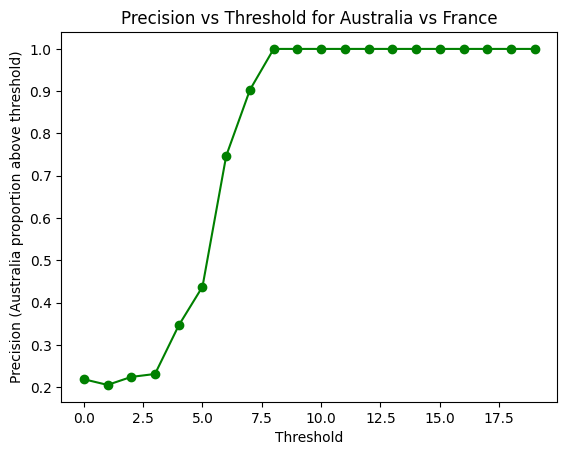

In [172]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

thresholds = range(0, 20, 1)
for t in thresholds:
    tp = (df[df['country']=='Australia']['sum_llrs'] > t).sum()
    fp = (df[df['country']=='France']['sum_llrs'] > t).sum()
    prec = tp / (tp + fp) if (tp + fp) > 0 else float('nan')
    print(f"t={t:2d}: Australia_above={tp:3d}, France_above={fp:3d}, precision={prec:.2f}")
australia_counts = [(df[df['country']=='Australia']['sum_llrs'] > t).sum() for t in thresholds]
france_counts = [(df[df['country']=='France']['sum_llrs'] > t).sum() for t in thresholds]
precision = [australia_counts[i] / (australia_counts[i] + france_counts[i]) for i in range(len(thresholds))]

plt.plot(thresholds, precision, color='green', marker='o')
plt.xlabel("Threshold")
plt.ylabel("Precision (Australia proportion above threshold)")
plt.title("Precision vs Threshold for Australia vs France")
plt.show()

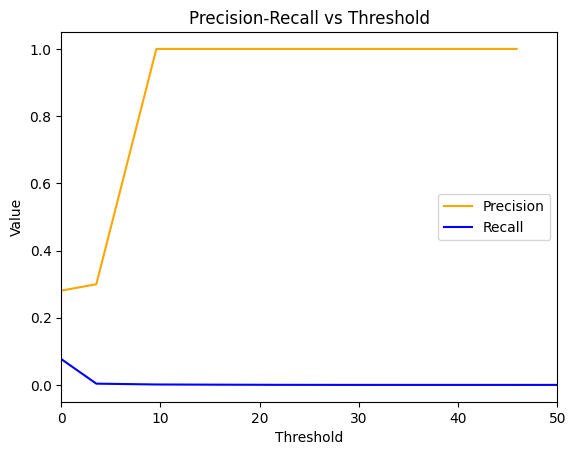

In [173]:
thresholds = np.linspace(df['sum_llrs'].min(), df['sum_llrs'].max(), 100)
aus_total = (df['country']=='Australia').sum()

precisions = []
recalls = []
for t in thresholds:
    tp = (df[df['country']=='Australia']['sum_llrs'] > t).sum()
    fp = (df[df['country']=='France']['sum_llrs'] > t).sum()
    precisions.append(tp / (tp + fp) if (tp + fp) > 0 else np.nan)
    recalls.append(tp / aus_total)  # proportion of Australia captured

plt.plot(thresholds, precisions, label='Precision', color='orange')
plt.plot(thresholds, recalls, label='Recall', color='blue')
plt.xlabel('Threshold')
plt.xlim(0,50)
plt.ylabel('Value')
plt.legend()
plt.title('Precision-Recall vs Threshold')
plt.show()

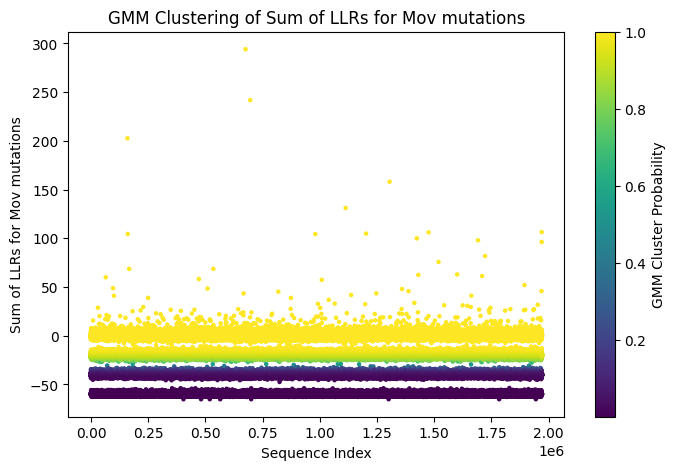

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.mixture import GaussianMixture

X = df[['sum_llrs']].values
gmm = GaussianMixture(n_components=2).fit(X)


df['GMM_cluster'] = gmm.predict_proba(X)[:,-1]
plt.figure(figsize=(8,5))
plt.scatter(df.index, df['sum_llrs'], c=df['GMM_cluster'], cmap='viridis', s=5)
plt.xlabel('Sequence Index')
plt.ylabel('Sum of LLRs for Mov mutations')
plt.title('GMM Clustering of Sum of LLRs for Mov mutations')
plt.colorbar(label='GMM Cluster Probability')
plt.show()



In [190]:
df.columns.tolist()

['seqName', 'sum_llrs', 'country', 'year']

In [197]:
df['mean_llrs']=df[mov_cols].mean(axis=1,numeric_only=True)
df['mean_llrs'].head()
print(df['mean_llrs'].min())
print(df['mean_llrs'].max())

-76.29558366348246
73.52185709268798


/var/folders/bt/jpy5j9ms7pb6p6hhqzvpjffw0000gn/T/ipykernel_42965/1964916947.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mean_llrs']=df[mov_cols].mean(axis=1,numeric_only=True)


t= 0: Australia_above=1595, France_above=5700, precision=0.22
t= 1: Australia_above= 91, France_above=172, precision=0.35
t= 2: Australia_above= 50, France_above=  0, precision=1.00
t= 3: Australia_above= 28, France_above=  0, precision=1.00
t= 4: Australia_above= 21, France_above=  0, precision=1.00
t= 5: Australia_above=  9, France_above=  0, precision=1.00
t= 6: Australia_above=  5, France_above=  0, precision=1.00
t= 7: Australia_above=  3, France_above=  0, precision=1.00
t= 8: Australia_above=  3, France_above=  0, precision=1.00
t= 9: Australia_above=  2, France_above=  0, precision=1.00
t=10: Australia_above=  2, France_above=  0, precision=1.00
t=11: Australia_above=  1, France_above=  0, precision=1.00
t=12: Australia_above=  0, France_above=  0, precision=nan
t=13: Australia_above=  0, France_above=  0, precision=nan
t=14: Australia_above=  0, France_above=  0, precision=nan
t=15: Australia_above=  0, France_above=  0, precision=nan
t=16: Australia_above=  0, France_above=  

/var/folders/bt/jpy5j9ms7pb6p6hhqzvpjffw0000gn/T/ipykernel_42965/517262710.py:9: RuntimeWarning: invalid value encountered in scalar divide
  precision = [australia_counts[i] / (australia_counts[i] + france_counts[i]) for i in range(len(thresholds))]


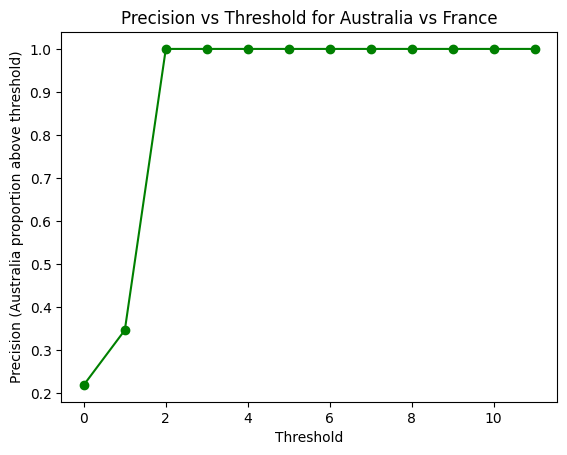

In [198]:

thresholds = range(0, 20, 1)
for t in thresholds:
    tp = (df[df['country']=='Australia']['mean_llrs'] > t).sum()
    fp = (df[df['country']=='France']['mean_llrs'] > t).sum()
    prec = tp / (tp + fp) if (tp + fp) > 0 else float('nan')
    print(f"t={t:2d}: Australia_above={tp:3d}, France_above={fp:3d}, precision={prec:.2f}")
australia_counts = [(df[df['country']=='Australia']['mean_llrs'] > t).sum() for t in thresholds]
france_counts = [(df[df['country']=='France']['mean_llrs'] > t).sum() for t in thresholds]
precision = [australia_counts[i] / (australia_counts[i] + france_counts[i]) for i in range(len(thresholds))]

plt.plot(thresholds, precision, color='green', marker='o')
plt.xlabel("Threshold")
plt.ylabel("Precision (Australia proportion above threshold)")
plt.title("Precision vs Threshold for Australia vs France")
plt.show()

(array([3.20600e+03, 6.61000e+02, 4.76300e+03, 1.92900e+03, 2.05000e+02,
        4.98000e+02, 3.56000e+02, 2.79000e+02, 1.30700e+03, 7.46000e+02,
        4.10000e+01, 1.65000e+02, 1.25400e+03, 9.29000e+02, 3.14300e+03,
        2.92600e+03, 3.71300e+03, 5.37600e+03, 2.37200e+03, 1.65800e+03,
        1.41100e+03, 4.04300e+03, 2.94500e+03, 4.91200e+03, 1.63100e+03,
        2.71200e+03, 5.62500e+03, 3.87800e+03, 4.18900e+03, 4.43900e+03,
        4.39700e+03, 5.60300e+03, 6.15100e+03, 3.01200e+03, 4.35200e+03,
        5.01100e+03, 4.42700e+03, 6.17400e+03, 8.04300e+03, 7.94100e+03,
        4.88800e+03, 9.72600e+03, 5.47900e+03, 4.50500e+03, 3.23600e+03,
        5.64300e+03, 1.14970e+04, 9.20400e+03, 9.82100e+03, 1.62880e+04,
        9.02200e+03, 7.90400e+03, 8.76300e+03, 5.68800e+03, 1.83270e+04,
        1.51590e+04, 1.55030e+04, 2.00330e+04, 1.05190e+04, 1.08790e+04,
        1.63620e+04, 2.14030e+04, 1.91280e+04, 2.05900e+04, 2.55460e+04,
        3.94600e+04, 2.06850e+04, 1.85560e+04, 1.45

Text(0.5, 1.0, 'Isolation Forest Anomaly Score Distribution')

Text(0.5, 0, 'Score')

Text(0, 0.5, 'Count')

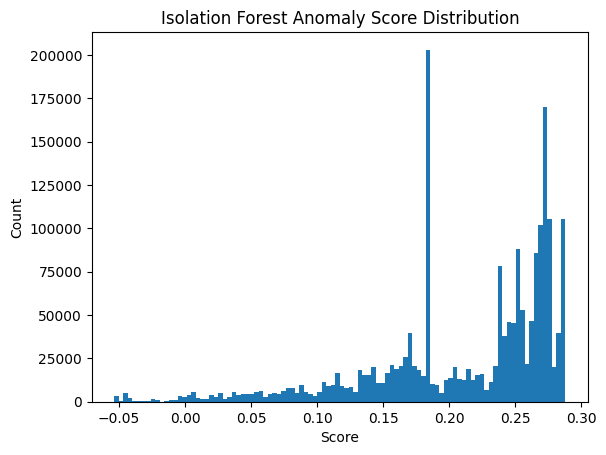

In [149]:
df['anomaly_score'] = scores_iso
df['is_anomaly'] = (labels_iso == -1).astype(int)
df[df['is_anomaly'] == 1].sort_values('anomaly_score').head(30)

,seqName,LLR,G>A_llr,C>T_llr,A>G_llr,A>T_llr,C>A_llr,G>T_llr,T>A_llr,T>G_llr,T>C_llr,C>G_llr,A>C_llr,G>C_llr,sum_llrs,is_anomaly,anomaly_score,iso_score,iso_label
481119,hCoV-19/Ireland/CW-NVRL-S22IRL00445027/2022|20...,-1.785972,3.742774,-20.0,-20.0,-20.000000,-20.0,0.907851,-20.000000,-20.0,-20.0,-20.0,-20.0,-20.0,-56.257226,1,-0.053541,-0.053541,-1
746454,hCoV-19/France/GES-HMN-22032040330/2022|2022-0...,1.010345,3.580906,-20.0,-20.0,-20.000000,-20.0,-20.000000,-20.000000,-20.0,-20.0,-20.0,-20.0,-20.0,-56.419094,1,-0.053541,-0.053541,-1
973149,hCoV-19/Japan/TKYkbm40495/2022|2022-07-15|2022...,1.515518,3.285591,-20.0,-20.0,-20.000000,-20.0,-20.000000,-20.000000,-20.0,-20.0,-20.0,-20.0,-20.0,-56.714409,1,-0.053541,-0.053541,-1
1940081,hCoV-19/USA/TX-CDC-ASC210174977/2021|2021-08-2...,-0.499385,3.580906,-20.0,-20.0,-20.000000,-20.0,0.426996,-20.000000,-20.0,-20.0,-20.0,-20.0,-20.0,-56.419094,1,-0.053541,-0.053541,-1
1188118,hCoV-19/Japan/TKYhug2799/2022|2022-07-01|2022-...,1.515518,3.285591,-20.0,-20.0,-20.000000,-20.0,-20.000000,-20.000000,-20.0,-20.0,-20.0,-20.0,-20.0,-56.714409,1,-0.053541,-0.053541,-1
744292,hCoV-19/Japan/PG-352560/2022|2022-08-30|2022-0...,-1.349792,3.285591,-20.0,-20.0,0.329674,-20.0,-20.000000,-0.106306,-20.0,-20.0,-20.0,-20.0,-20.0,-56.714409,1,-0.053541,-0.053541,-1
478830,hCoV-19/Malaysia/UMS-P25835/2022|2022-12-01|20...,-0.499385,3.742774,-20.0,-20.0,-20.000000,-20.0,-20.000000,-20.000000,-20.0,-20.0,-20.0,-20.0,-20.0,-56.257226,1,-0.053541,-0.053541,-1
1538945,hCoV-19/Japan/PG-283861/2022|2022-07-18|2022-0...,-0.844619,3.834359,-20.0,-20.0,0.329674,-20.0,-20.000000,-0.106306,-20.0,-20.0,-20.0,-20.0,-20.0,-56.165641,1,-0.053541,-0.053541,-1
883997,hCoV-19/USA/MO-CDC-QDX38831584/2022|2022-07-07...,-0.281894,3.285591,-20.0,-20.0,-20.000000,-20.0,-20.000000,-20.000000,-20.0,-20.0,-20.0,-20.0,-20.0,-56.714409,1,-0.053541,-0.053541,-1
483963,hCoV-19/England/PHEC-2FA4A1/2021|2021-02-13|20...,-0.499385,3.580906,-20.0,-20.0,-20.000000,-20.0,-20.000000,-20.000000,-20.0,-20.0,-20.0,-20.0,-20.0,-56.419094,1,-0.053541,-0.053541,-1


0    -4.125219
1   -15.000000
2   -15.000000
3   -15.000000
4    -9.988798
Name: mean_llrs, dtype: float64

In [151]:
df['mean_llrs'].describe()

count    1.970300e+06
mean    -7.429498e+00
std      4.332342e+00
min     -1.629558e+01
25%     -1.005713e+01
50%     -9.395801e+00
75%     -4.893047e+00
max      7.352186e+01
Name: mean_llrs, dtype: float64

In [7]:
from sklearn.svm import OneClassSVM

normals = df[df['mean_llrs'].between(df['mean_llrs'].quantile(0.05), df['mean_llrs'].quantile(0.95))]
svm = OneClassSVM(nu=0.01, kernel="rbf")
svm.fit(normals[['mean_llrs']].sample(500000, random_state=42))

predictions = svm.predict(df[['mean_llrs']].values)
decision_scores = svm.decision_function(df[['mean_llrs']].values)

# Add to dataframe
df['svm_prediction'] = predictions  # 1 = normal, -1 = anomaly
df['svm_score'] = decision_scores  
print(f"Anomalies detected: {(predictions == -1).sum()}")
print(f"Anomalies %: {(predictions == -1).sum() / len(df) * 100:.2f}%")

high_anomalies = df[(df['svm_prediction'] == -1) & (df['mean_llrs'] > df['mean_llrs'].median())]
print(f"High LLR anomalies: {len(high_anomalies)}")
print(high_anomalies['mean_llrs'].describe())




# threshold = df['mean_llrs'].quantile(0.99)  # Top 1%
# df['is_high_anomaly'] = df['mean_llrs'] > threshold
# plt.hist(df['mean_llrs'], bins=100)
# plt.axvline(threshold, color='red', label='Threshold')

/Users/reem/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but OneClassSVM was fitted with feature names
  warnings.warn(
/Users/reem/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but OneClassSVM was fitted with feature names
  warnings.warn(


Anomalies detected: 322160
Anomalies %: 16.35%
High LLR anomalies: 127508
count    127508.000000
mean         -0.651707
std           2.209454
min          -5.155520
25%           0.110413
50%           0.226776
75%           0.415887
max          73.521857
Name: mean_llrs, dtype: float64


In [23]:
true_like = high_anomalies[high_anomalies['sum_llrs'] > 20]
print(len(true_like), "likely True sequences")

93 likely True sequences


In [17]:
# Define what "high" means - top 1% or 0.1%
median = df['sum_llrs'].median()
mad = np.median(np.abs(df['sum_llrs'] - median))

# Modified z-scores
modified_z = 0.6745 * (df['sum_llrs'] - median) / mad

# Only flag high values (positive z-scores above threshold)
threshold_z = 3.5  # Common threshold
df['is_high_anomaly'] = (modified_z > threshold_z) & (df['sum_llrs'] > median)

print(f"High anomalies (modified z-score > {threshold_z}): {df['is_high_anomaly'].sum()}")
print(f"\n=== HIGH ANOMALY STATISTICS ===")
print(df[df['is_high_anomaly']]['sum_llrs'].describe())

High anomalies (modified z-score > 3.5): 24

=== HIGH ANOMALY STATISTICS ===
count     24.000000
mean     106.533080
std       61.303167
min       52.044845
25%       62.797588
50%       97.082395
75%      106.157246
max      294.087428
Name: sum_llrs, dtype: float64
